In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [3]:
cd = r"C:\Users\Nani\Desktop\auto-mpg.csv"


In [4]:
df = pd.read_csv(cd, na_values = "?")

In [5]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


## Data Pre processing 

 Our main to structure our data considering the format of the given test_mpg array. Datasets used in Kaggle are generally pre-processed already and data is suitable for model processing.

> The array consists of 9 elements which are scaled down. 9 elements - > 8 feature columns, 1 target column.

Steps for data pre-processing 

-> Removing NaN values from the dataset

-> Detailed processing for car_name column

-> Converting the categorical data into numberical using the methods of Label encoder or One hot encoding 

-> Splitting the data into training and testing arrays

In [6]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:
df.dropna(inplace= True, axis = 0)

In [8]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [9]:
len(df["car name"].unique())

301

There are 301 unique car_name values, therefore methods like one hot encoding or label encoders would not work. But from the give values we can observe that there are values with spelling errors representing the same company brand ( for ex: volkswagen being represented as vk or vokswagen etc). We can fix this by creating and dictionary for it to able to match to incorrect spellings to the correct ones.

In [10]:
df["brand"] = df["car name"].apply(lambda x: re.search(r'\A\w+' ,x).group(0) )

In [11]:
len(df["brand"].unique())

36

In [12]:
spell_check = {
        'chevroelt': 'chevrolet',
        'chevy': 'chevrolet',
        'maxda': 'mazda',
        'toyouta': 'toyota',
        'vw': 'volkswagen',
        'vokswagen': 'volkswagen',
        
    }

In [13]:
df["brand"] = df["brand"].replace(spell_check)

Since now we have only 30 unique values, we can using label encoder to covert the catgerical values to numerical. 

In [14]:
len(df["brand"].unique())

30

In [15]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,brand
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,ford
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,volkswagen
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,dodge
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,ford


In [16]:
le = LabelEncoder()
df.brand = le.fit_transform(df.brand)


In [17]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,brand
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,6
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,3
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,21
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,11
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,11
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,28
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,9
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,11


In [18]:
train_y = df["mpg"]

In [19]:
train_x = df.drop(["mpg", "car name"], axis = 1)

In [20]:
train_x

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand
0,8,307.0,130.0,3504,12.0,70,1,6
1,8,350.0,165.0,3693,11.5,70,1,3
2,8,318.0,150.0,3436,11.0,70,1,21
3,8,304.0,150.0,3433,12.0,70,1,0
4,8,302.0,140.0,3449,10.5,70,1,11
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,11
394,4,97.0,52.0,2130,24.6,82,2,28
395,4,135.0,84.0,2295,11.6,82,1,9
396,4,120.0,79.0,2625,18.6,82,1,11


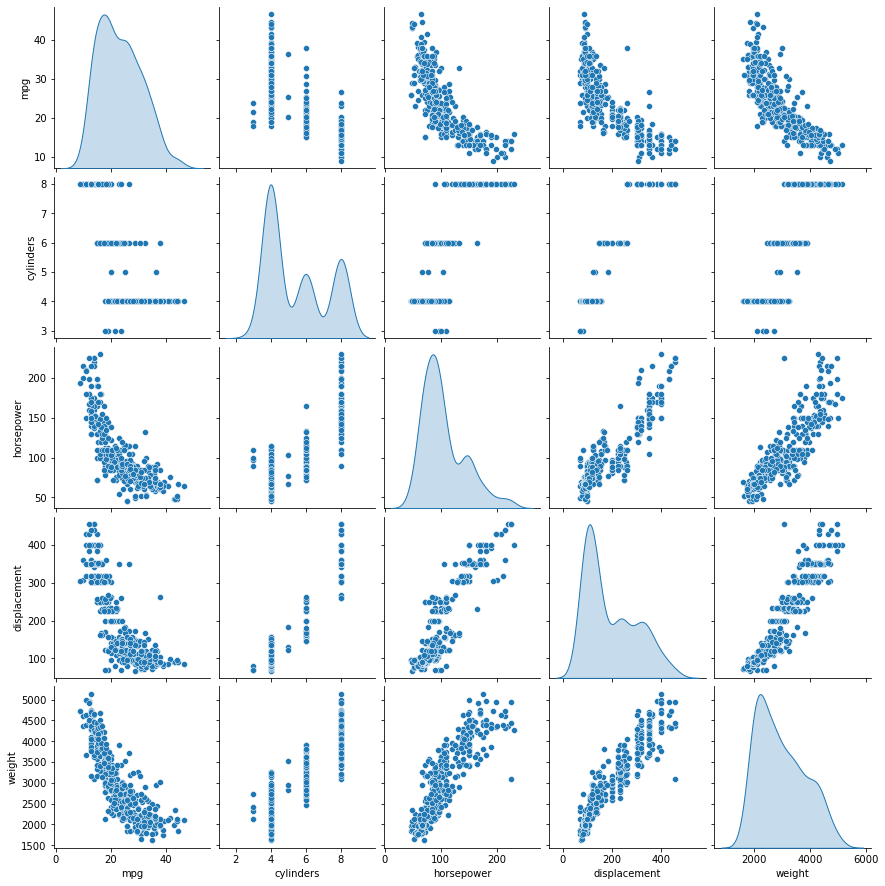

In [21]:
sns.pairplot(df[["mpg", "cylinders","horsepower", "displacement", "weight"]], diag_kind="kde")

In [22]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=1)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression


In [25]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [26]:
linear_r2 = regression_model.score(X_test, y_test)

In [27]:
print("Linear Regression R^2: {:.5f}".format(linear_r2))

Linear Regression R^2: 0.82146


In [28]:
predict = regression_model.predict(X_test)

In [29]:
test_mpg = np.array([2, 3, 2, -2, -1, -2, -1, 0], ndmin=2)

In [30]:
lr_pred =  regression_model.predict(test_mpg)

In [31]:
lr_pred

array([33.65445753])

In [32]:
X_train

array([[-0.81216668, -0.653244  , -0.39706495, ...,  1.12309044,
         0.50970208,  1.53260235],
       [-0.81216668, -0.68249612, -0.55577508, ...,  1.66534027,
        -0.73724764, -0.9452268 ],
       [-0.81216668, -0.89701167, -1.34932574, ...,  1.66534027,
         0.50970208,  1.65059422],
       ...,
       [ 1.53647365,  1.15063682,  0.71390598, ..., -1.04590889,
        -0.73724764, -0.9452268 ],
       [-0.81216668, -0.88726097, -1.05835717, ...,  0.30971569,
        -0.73724764, -0.9452268 ],
       [ 1.53647365,  1.56991722,  1.63971508, ..., -1.31703381,
        -0.73724764, -0.9452268 ]])

In [33]:
r2_lr = r2_score(y_test, predict)

In [34]:
print("Linear Regression R^2: {:.5f}".format(r2_lr))

Linear Regression R^2: 0.82146


In [35]:
mse_lr = mean_squared_error(y_test, predict)

In [36]:
print("Mead Squared Error for Linear Regression Model: {:.5f}".format(mse_lr))

Mead Squared Error for Linear Regression Model: 11.86997


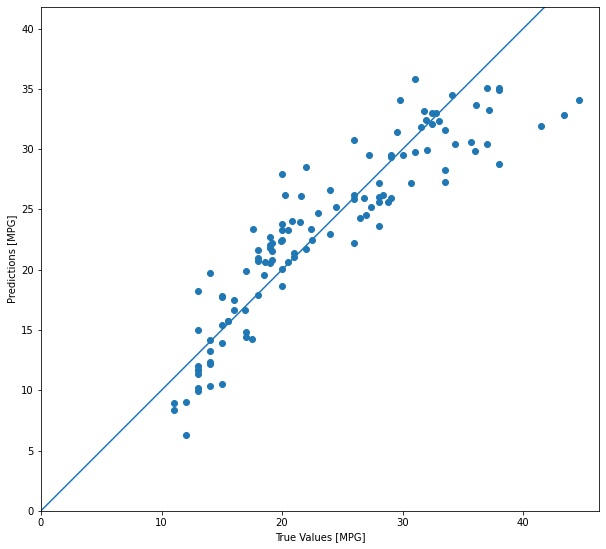

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predict)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

## Random Forest Regressor 


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [39]:
regressor=RandomForestRegressor()


In [40]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [41]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [42]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [43]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [44]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [45]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [46]:
rf_random.best_params_


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [47]:
rf_random.best_score_


-7.266780116741823

In [48]:
predictions=rf_random.predict(X_test)


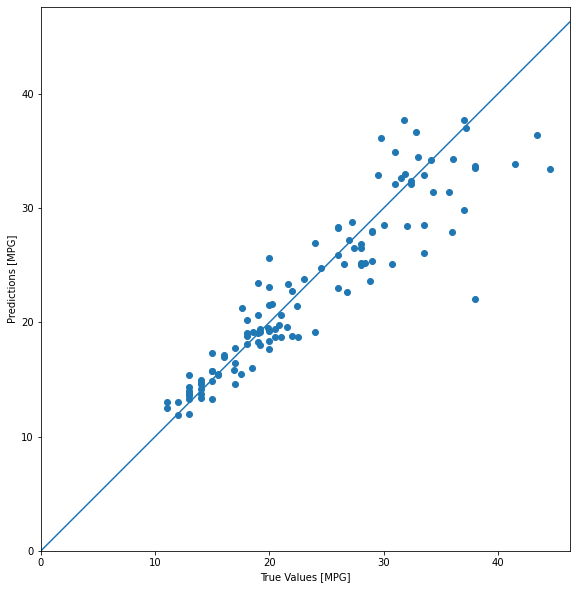

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [50]:
mse_rf = mean_squared_error(y_test, predictions)

In [51]:
print("Mean Squared error for Random Forest model: {:.5f}".format(mse_rf))

Mean Squared error for Random Forest model: 10.69810


In [52]:
r2_rf=r2_score(y_test, predictions)

In [53]:
print("Random Forest R^2: {:.5f}".format(r2_rf))

Random Forest R^2: 0.83909


In [54]:
in_sampleScore = regression_model.score(X_train, y_train)
print(f'In-Sample score = {in_sampleScore}')

out_sampleScore = regression_model.score(X_test, y_test)
print(f'Out-Sample Score = {out_sampleScore}')

In-Sample score = 0.8201734519682966
Out-Sample Score = 0.8214599018805142


In [55]:
for_pred = rf_random.predict(test_mpg)

In [56]:
# test_predictions = model.predict(normed_test_data).flatten()


## Neural Networks


In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

We create a straigh forward NN architecture with 4801 number of parameters, with 3 layers. The data is divided into training (70%) and validation data (30%). The model will be trained for 500 epochs with RMS optimizer and will be validating the model with Mean Square Error loss. 

In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 64, activation = tf.nn.relu, input_shape = [X_train.shape[1]]),
    tf.keras.layers.Dense(units = 64, activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 1)
    ])

In [59]:
model.compile(loss = 'mse', optimizer = tf.keras.optimizers.RMSprop(0.001), metrics = ['mae','mse'])

In [60]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [61]:
history = model.fit(X_train, y_train, epochs = 500, validation_data=(X_test, y_test))

Epoch 1/500
9/9 [==============================] - 1s 21ms/step - loss: 565.2853 - mae: 22.4257 - mse: 565.2853 - val_loss: 542.0443 - val_mae: 21.6353 - val_mse: 542.0443
Epoch 2/500
9/9 [==============================] - 0s 5ms/step - loss: 503.5475 - mae: 20.9648 - mse: 503.5475 - val_loss: 484.0367 - val_mae: 20.1933 - val_mse: 484.0367
Epoch 3/500
9/9 [==============================] - 0s 4ms/step - loss: 443.9846 - mae: 19.4611 - mse: 443.9846 - val_loss: 425.9466 - val_mae: 18.6395 - val_mse: 425.9466
Epoch 4/500
9/9 [==============================] - 0s 3ms/step - loss: 382.3365 - mae: 17.7952 - mse: 382.3365 - val_loss: 364.4396 - val_mae: 16.8998 - val_mse: 364.4396
Epoch 5/500
9/9 [==============================] - 0s 3ms/step - loss: 316.6484 - mae: 16.0120 - mse: 316.6484 - val_loss: 300.4853 - val_mae: 15.1595 - val_mse: 300.4853
Epoch 6/500
9/9 [==============================] - 0s 3ms/step - loss: 251.1600 - mae: 14.1610 - mse: 251.1600 - val_loss: 239.3461 - val_mae: 1

9/9 [==============================] - 0s 4ms/step - loss: 4.9957 - mae: 1.6459 - mse: 4.9957 - val_loss: 9.6611 - val_mae: 2.2384 - val_mse: 9.6611
Epoch 101/500
9/9 [==============================] - 0s 4ms/step - loss: 5.0436 - mae: 1.6760 - mse: 5.0436 - val_loss: 9.4294 - val_mae: 2.1982 - val_mse: 9.4294
Epoch 102/500
9/9 [==============================] - 0s 4ms/step - loss: 5.0122 - mae: 1.6574 - mse: 5.0122 - val_loss: 9.6361 - val_mae: 2.2310 - val_mse: 9.6361
Epoch 103/500
9/9 [==============================] - 0s 4ms/step - loss: 5.3232 - mae: 1.7189 - mse: 5.3232 - val_loss: 9.2078 - val_mae: 2.1396 - val_mse: 9.2078
Epoch 104/500
9/9 [==============================] - 0s 4ms/step - loss: 4.9661 - mae: 1.6742 - mse: 4.9661 - val_loss: 9.1913 - val_mae: 2.1693 - val_mse: 9.1913
Epoch 105/500
9/9 [==============================] - 0s 4ms/step - loss: 5.0084 - mae: 1.6621 - mse: 5.0084 - val_loss: 9.2403 - val_mae: 2.2005 - val_mse: 9.2403
Epoch 106/500
9/9 [=================

Epoch 200/500
9/9 [==============================] - 0s 3ms/step - loss: 3.9154 - mae: 1.4534 - mse: 3.9154 - val_loss: 9.8519 - val_mae: 2.2465 - val_mse: 9.8519
Epoch 201/500
9/9 [==============================] - 0s 4ms/step - loss: 3.8799 - mae: 1.4256 - mse: 3.8799 - val_loss: 9.7312 - val_mae: 2.2164 - val_mse: 9.7312
Epoch 202/500
9/9 [==============================] - 0s 4ms/step - loss: 3.9840 - mae: 1.4416 - mse: 3.9840 - val_loss: 9.6073 - val_mae: 2.1958 - val_mse: 9.6073
Epoch 203/500
9/9 [==============================] - 0s 4ms/step - loss: 4.0049 - mae: 1.4526 - mse: 4.0049 - val_loss: 9.8319 - val_mae: 2.2624 - val_mse: 9.8319
Epoch 204/500
9/9 [==============================] - 0s 3ms/step - loss: 3.8674 - mae: 1.4548 - mse: 3.8674 - val_loss: 9.7299 - val_mae: 2.2105 - val_mse: 9.7299
Epoch 205/500
9/9 [==============================] - 0s 4ms/step - loss: 3.8863 - mae: 1.4283 - mse: 3.8863 - val_loss: 9.7020 - val_mae: 2.2239 - val_mse: 9.7020
Epoch 206/500
9/9 [===

Epoch 250/500
9/9 [==============================] - 0s 4ms/step - loss: 3.4586 - mae: 1.3376 - mse: 3.4586 - val_loss: 9.5638 - val_mae: 2.2268 - val_mse: 9.5638
Epoch 251/500
9/9 [==============================] - 0s 4ms/step - loss: 3.4225 - mae: 1.3253 - mse: 3.4225 - val_loss: 9.9510 - val_mae: 2.3081 - val_mse: 9.9510
Epoch 252/500
9/9 [==============================] - 0s 4ms/step - loss: 3.5170 - mae: 1.3572 - mse: 3.5170 - val_loss: 9.7168 - val_mae: 2.2346 - val_mse: 9.7168
Epoch 253/500
9/9 [==============================] - 0s 3ms/step - loss: 3.4947 - mae: 1.3401 - mse: 3.4947 - val_loss: 9.6971 - val_mae: 2.2302 - val_mse: 9.6971
Epoch 254/500
9/9 [==============================] - 0s 4ms/step - loss: 3.4266 - mae: 1.3463 - mse: 3.4266 - val_loss: 9.6136 - val_mae: 2.2130 - val_mse: 9.6136
Epoch 255/500
9/9 [==============================] - 0s 4ms/step - loss: 3.4574 - mae: 1.3325 - mse: 3.4574 - val_loss: 9.7359 - val_mae: 2.2284 - val_mse: 9.7359
Epoch 256/500
9/9 [===

9/9 [==============================] - 0s 4ms/step - loss: 3.2593 - mae: 1.3204 - mse: 3.2593 - val_loss: 9.9741 - val_mae: 2.2764 - val_mse: 9.9741
Epoch 301/500
9/9 [==============================] - 0s 4ms/step - loss: 3.0346 - mae: 1.2646 - mse: 3.0346 - val_loss: 10.0349 - val_mae: 2.3258 - val_mse: 10.0349
Epoch 302/500
9/9 [==============================] - 0s 4ms/step - loss: 3.0631 - mae: 1.2907 - mse: 3.0631 - val_loss: 9.8121 - val_mae: 2.2323 - val_mse: 9.8121
Epoch 303/500
9/9 [==============================] - 0s 4ms/step - loss: 2.9535 - mae: 1.2158 - mse: 2.9535 - val_loss: 9.8064 - val_mae: 2.2673 - val_mse: 9.8064
Epoch 304/500
9/9 [==============================] - 0s 4ms/step - loss: 3.0372 - mae: 1.2701 - mse: 3.0372 - val_loss: 10.1240 - val_mae: 2.3069 - val_mse: 10.1240
Epoch 305/500
9/9 [==============================] - 0s 4ms/step - loss: 3.0040 - mae: 1.2464 - mse: 3.0040 - val_loss: 11.5781 - val_mae: 2.4812 - val_mse: 11.5781
Epoch 306/500
9/9 [===========

Epoch 350/500
9/9 [==============================] - 0s 4ms/step - loss: 2.7913 - mae: 1.1991 - mse: 2.7913 - val_loss: 10.8809 - val_mae: 2.4372 - val_mse: 10.8809
Epoch 351/500
9/9 [==============================] - 0s 4ms/step - loss: 2.8176 - mae: 1.2053 - mse: 2.8176 - val_loss: 10.1202 - val_mae: 2.2887 - val_mse: 10.1202
Epoch 352/500
9/9 [==============================] - 0s 4ms/step - loss: 2.7463 - mae: 1.1894 - mse: 2.7463 - val_loss: 10.3184 - val_mae: 2.3294 - val_mse: 10.3184
Epoch 353/500
9/9 [==============================] - 0s 4ms/step - loss: 2.8059 - mae: 1.2284 - mse: 2.8059 - val_loss: 9.8537 - val_mae: 2.2557 - val_mse: 9.8537
Epoch 354/500
9/9 [==============================] - 0s 4ms/step - loss: 2.8480 - mae: 1.2173 - mse: 2.8480 - val_loss: 10.3545 - val_mae: 2.3229 - val_mse: 10.3545
Epoch 355/500
9/9 [==============================] - 0s 4ms/step - loss: 2.8454 - mae: 1.1901 - mse: 2.8454 - val_loss: 10.0262 - val_mae: 2.2873 - val_mse: 10.0262
Epoch 356/50

9/9 [==============================] - 0s 4ms/step - loss: 2.2752 - mae: 1.0619 - mse: 2.2752 - val_loss: 10.3446 - val_mae: 2.3405 - val_mse: 10.3446
Epoch 449/500
9/9 [==============================] - 0s 4ms/step - loss: 2.3636 - mae: 1.0575 - mse: 2.3636 - val_loss: 10.1983 - val_mae: 2.3245 - val_mse: 10.1983
Epoch 450/500
9/9 [==============================] - 0s 3ms/step - loss: 2.2441 - mae: 1.0357 - mse: 2.2441 - val_loss: 9.9184 - val_mae: 2.2848 - val_mse: 9.9184
Epoch 451/500
9/9 [==============================] - 0s 3ms/step - loss: 2.1660 - mae: 1.0264 - mse: 2.1660 - val_loss: 11.2145 - val_mae: 2.4290 - val_mse: 11.2145
Epoch 452/500
9/9 [==============================] - 0s 4ms/step - loss: 2.3724 - mae: 1.0543 - mse: 2.3724 - val_loss: 10.2410 - val_mae: 2.3210 - val_mse: 10.2410
Epoch 453/500
9/9 [==============================] - 0s 4ms/step - loss: 2.2105 - mae: 1.0501 - mse: 2.2105 - val_loss: 10.3145 - val_mae: 2.3595 - val_mse: 10.3145
Epoch 454/500
9/9 [=======

Epoch 498/500
9/9 [==============================] - 0s 4ms/step - loss: 2.0978 - mae: 1.0133 - mse: 2.0978 - val_loss: 10.5769 - val_mae: 2.3371 - val_mse: 10.5769
Epoch 499/500
9/9 [==============================] - 0s 3ms/step - loss: 2.0475 - mae: 1.0126 - mse: 2.0475 - val_loss: 10.6574 - val_mae: 2.3694 - val_mse: 10.6574
Epoch 500/500
9/9 [==============================] - 0s 4ms/step - loss: 2.2336 - mae: 1.0526 - mse: 2.2336 - val_loss: 10.0097 - val_mae: 2.2832 - val_mse: 10.0097


In [62]:
y_pred = model.predict(X_test)


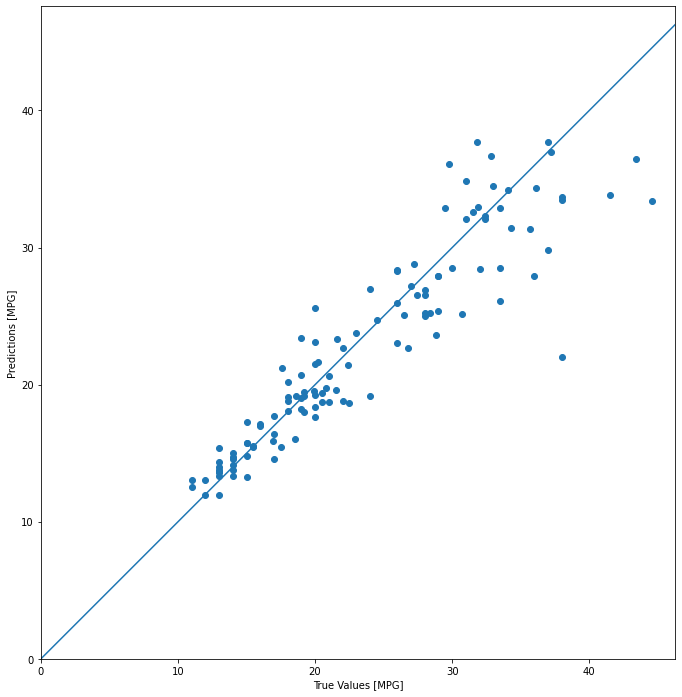

In [78]:
plt.figure(figsize=(12,12))
plt.scatter(y_test, predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [64]:
mse_nn = mean_squared_error(y_test, y_pred)

In [65]:
print("Mean Squared Error for Neural Network Model: {:.5f}".format(mse_nn))

Mean Squared Error for Neural Network Model: 10.00971


In [66]:
r2_nn = r2_score(y_test, y_pred)


In [67]:
print("Neural Network Model R^2: {:.5f}".format(r2_nn))

Neural Network Model R^2: 0.84944


In [68]:
nn_pred = model.predict(test_mpg)

In [69]:
test_mpg[0]

array([ 2,  3,  2, -2, -1, -2, -1,  0])

In [70]:
model_df = pd.DataFrame({
    "Model" : ["Linear Regression", "Random Forest", "Neural Networks"],
    "RMSE" : [mse_lr, mse_rf, mse_nn],
    "R2 Score" : [r2_lr, r2_rf, r2_nn],
    "test_mpg" :(test_mpg[0], test_mpg[0], test_mpg[0]),
    "Model Predictions": (lr_pred[0], for_pred[0], nn_pred[0][0]) 
})

> Comparison of all 3 models and the model predictions for the test_mpg array.

In [71]:
model_df

,Model,RMSE,R2 Score,test_mpg,Model Predictions
0,Linear Regression,11.869968,0.821460,"[2, 3, 2, -2, -1, -2, -1, 0]",33.654458
1,Random Forest,10.698095,0.839086,"[2, 3, 2, -2, -1, -2, -1, 0]",17.558700
2,Neural Networks,10.009713,0.849441,"[2, 3, 2, -2, -1, -2, -1, 0]",24.277493
